# Question 3.7 task (d)

In [1]:
import config as c
import numpy as np
import matplotlib.pyplot as plt
from simulation import solve_simulation
from opt_initial_values import inital_values
from opt_diags_gen import diags_gen_backwards_euler

# nicer looking default plots (according to your github)
plt.style.use('bmh')

In [2]:
Us = []
n_sim = 10+1
center = -20 * c.milli
sides = 40 * c.milli
v_values = np.linspace(center - sides, center + sides ,n_sim)

print("v_values",v_values)

for v_appl in v_values:
    inital_distr = inital_values(v_appl)
    Us.append(solve_simulation(inital_distr,diags_gen_backwards_euler,cutoff=True))

v_values [-0.06  -0.052 -0.044 -0.036 -0.028 -0.02  -0.012 -0.004  0.004  0.012
  0.02 ]


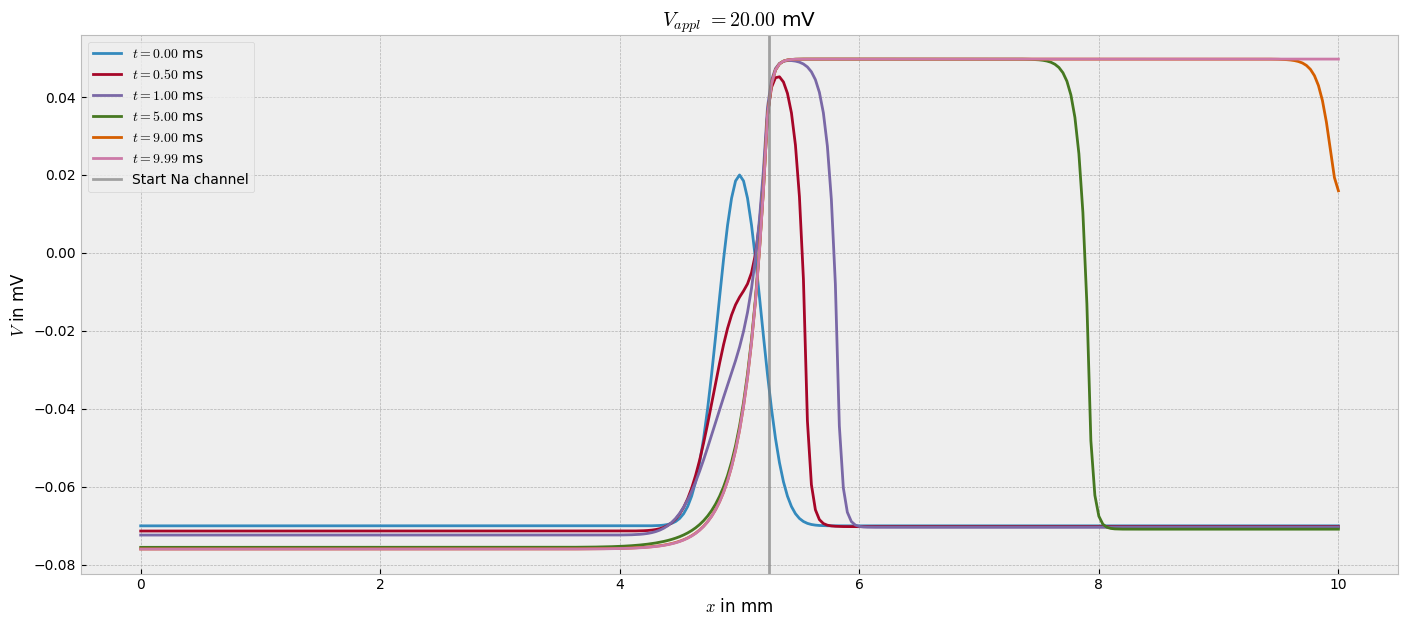

In [3]:
# plot different times
i_v_appl = -1
U = Us[i_v_appl]
      
#ts = np.arange(7)*20
ts = [0,50,100,500,900,999]

plt.figure(figsize=(17,7))
for t in ts:
    plt.plot(c.x_g/c.milli,U[t],label=f"$t={t*c.delta_t/c.milli:.2f}$ ms")

plt.title("$V_{appl}$" + f" $= {v_values[i_v_appl]/c.milli:.2f}$ mV")
plt.ylabel("$V$ in mV")
plt.xlabel("$x$ in mm")
plt.axvline((c.x_0+c.x_dist)/c.milli,label="Start Na channel",c="grey",alpha=0.7)
plt.legend()
plt.show()

after 9.99 ms


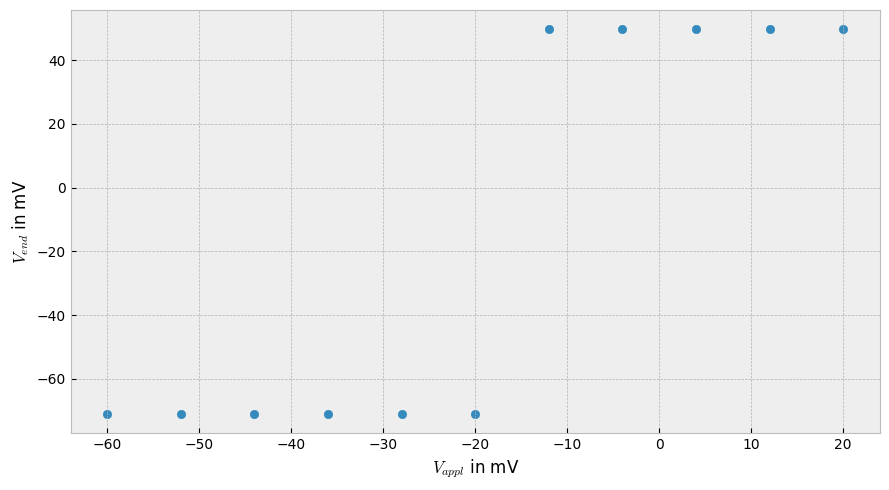

In [4]:
# plot endvoltage against v_appl
# volatage in the middle at the end
endvoltages = []
i_t = c.n_t-1
print("after",i_t*c.delta_t/c.milli,"ms")
for U in Us:

    endvoltages += [U[i_t,int(c.n_x*3/4)]]

plt.style.use('bmh')
plt.figure(figsize=(9,5))
plt.scatter(v_values/c.milli,np.array(endvoltages)/c.milli)
plt.ylabel("$V_{end}$ in mV")
plt.xlabel("$V_{appl}$ in mV")
#plt.axvline(c.v_mem,label="$V_{mem}$",alpha=0.5)
plt.tight_layout()
#plt.legend()
plt.show()

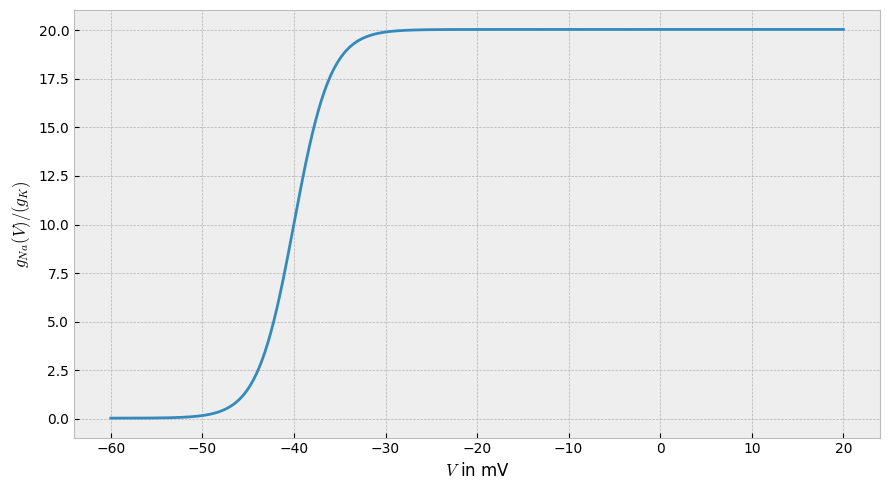

In [5]:
def g_na_g_k(v_vec):
    return ((100/(1 + np.exp(c.gamma*(c.v_star - v_vec)))) + 1/5)/c.g_k

x = np.linspace(center - sides, center + sides ,1000)
#x = np.linspace(-1e3,1e4,1000)

plt.style.use('bmh')
plt.figure(figsize=(9,5))
plt.plot(x/c.milli,g_na_g_k(x))
plt.ylabel("$g_{Na}(V)/(g_K)$")
plt.xlabel("$V$ in mV")
plt.tight_layout()
plt.show()
